Enter all ordered pairs separated by spaces: (1,1) (1,2) (1,3) (1,4) (1,5) (1,7) (1,8) (1,9) (2,2) (2,4) (2,6) (2,8) (3,3) (3,6) (3,9) (4,4) (4,8) (5,5) (6,6) (7,7) (8,8) (9,9)
Reflexive ✅
Antisymmetric ✅
Not Transitive ❌
The relation is not a partial order relation ❌
Enter all ordered pairs separated by spaces: (1,1) (1,2) (1,3) (1,4) (1,5) (1,6) (1,7) (1,8) (1,9) (2,2) (2,4) (2,6) (2,8) (3,3) (3,6) (3,9) (4,4) (4,8) (5,5) (6,6) (7,7) (8,8) (9,9)
Reflexive ✅
Antisymmetric ✅
Transitive ✅
The relation is a partial order relation ✅


C:\Users\MATEEN\AppData\Local\Temp\ipykernel_18296\2470624131.py:74: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G, prog="dot")


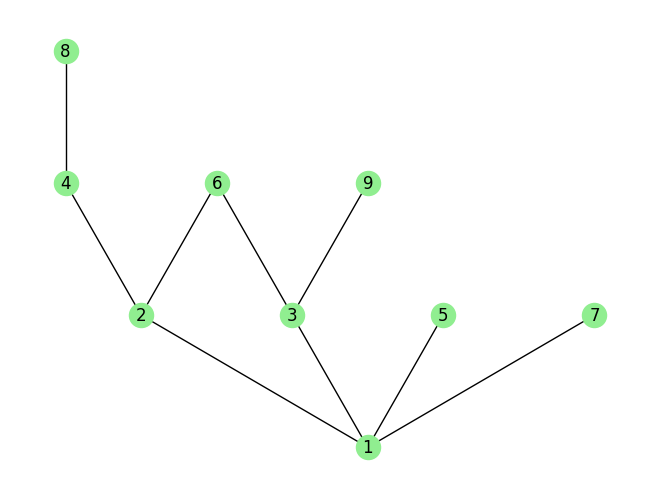

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot


def is_reflexive(relation):
    # Getting the set of elements from the relation
    elements = set()
    for a,b in relation:
        elements.add(a)
        elements.add(b)
    
    # Checking if every element is related to itself
    for x in elements:
        if (x,x) not in relation:
            print("Not Reflexive \u274C")
            return False
    print("Reflexive \u2705")
    return True


def is_antisymmetric(relation):
    # Checking if for every pair (a,b), there is no pair (b,a) with a != b
    for a, b in relation:
        if a != b and (b, a) in relation:
            print("Not Antisymmetric \u274C")
            return False
    print("Antisymmetric \u2705")
    return True


def is_transitive(relation):
    # Checking if for every pair (a,b) and (b,c), there is a pair (a,c)
    for a, b in relation:
        for c, d in relation:
            if b == c and (a, d) not in relation:
                print("Not Transitive \u274C")
                return False
    print("Transitive \u2705")
    return True


def is_partial_order(relation):
    reflexive = is_reflexive(relation)
    antisymmetric = is_antisymmetric(relation)
    transitive = is_transitive(relation)
    return reflexive and antisymmetric and transitive


def draw_hasse_diagram(relation):
    G = nx.DiGraph()

    # Adding the nodes and edges from the relation
    G.add_edges_from(relation)

    # Removing the transitive edges
    for u in G.nodes():
        for v in G.nodes():
            if u != v and G.has_edge(u, v):
                for w in G.nodes():
                    if v != w and G.has_edge(v, w) and G.has_edge(u, w):
                        G.remove_edge(u, w)

    # Removing the reflexive edges
    G.remove_edges_from(nx.selfloop_edges(G))

    # Reversing the direction of the edges
    G = G.reverse()
    # I did this because we want to draw G from bottom to top according to convention for Hasse diagrams
    # The dot layout algorithm function that I used in the next line produces hierarchical or layered drawings
    #   of directed graphs, where the nodes are arranged in ranks and the edges tend to point downwards (top to bottom)

    # Drawing the graph using dot layout algorithm
    pos = nx.nx_pydot.graphviz_layout(G, prog="dot")
    nx.draw(G, pos, with_labels=True, node_color="lightgreen", arrows=False)
    plt.show() # Showing the graph on screen


while True:
    # Taking relation input as ordered pairs from user as a single string separated by spaces
    relation = []
    input_string = input("

 Enter all ordered pairs separated by spaces: ")

    # Splitting string by spaces and converting each ordered pair to tuple of integers
    for ordered_pair in input_string.split():
        ordered_pair = tuple(map(int, ordered_pair.strip("()").split(",")))
        relation.append(ordered_pair)

    if is_partial_order(relation):
        print("The relation is a partial order relation \u2705")
        # Drawing Hasse diagram  
        draw_hasse_diagram(relation)
        break
    else:
       print("The relation is not a partial order relation \u274C")
